## WeRateDogs, Udacity Project: Data Wrangling & Analyzing from Twitter
### Merzu K Belete
#### 21 April 2018

## Introduction

### Gathering data
Importing packages for loading, gathering data and visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import tweepy 
from tweepy import OAuthHandler
import json 
import os
import time
import re
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.width', 1000)

### Set up plot style

In [2]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }
import matplotlib.style as style
sns.set_context(font_scale=1.0, rc={"lines.linewidth": 1.0})
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### Programmatically download the dog image prediction files from the Udacity server using request library and save to a file

In [5]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
print response

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

<Response [200]>


In [4]:
#open tsv file
images = pd.read_table('image-predictions.tsv', sep='\t')
images.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Using tweepy to access Twitter data
Tweepy supports accessing Twitter via Basic Authentication and the newer method, OAuth.
Here I set up an access for Twitter API using tweepy with OAuth to collect tweet data.

In [7]:
# Consumer keys and access tokens, used for OAuth
consumer_key = '*'
consumer_secret = '*'
access_token = '*'
access_secret = '*'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [8]:
#### Tweet Query using tweet_id information from the df.

In [9]:
tweet_data = {}
for tweet in list(df.tweet_id):
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 802247111496568832
Error for: 775096608509886464
Rate limit reached. Sleeping for: 689
Rate limit reached. Sleeping for: 695


### Read json file

In [11]:
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = True)

In [5]:
tweet_df = pd.read_json('tweet_json.txt',orient='index')
tweet_df.head(2)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{u'symbols': [], u'media': [{u'expanded_url': ...",{u'media': [{u'expanded_url': u'https://twitte...,2564,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,520,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{u'follow_request_sent': False, u'has_extended..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{u'symbols': [], u'media': [{u'expanded_url': ...",{u'media': [{u'expanded_url': u'https://twitte...,130,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{u'follow_request_sent': False, u'has_extended..."


In [6]:
len(df), len(images), len(tweet_df)

(2356, 2075, 2345)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [9]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2345 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2345 non-null datetime64[ns]
entities                         2345 non-null object
extended_entities                1824 non-null object
favorite_count                   2345 non-null int64
favorited                        2345 non-null int64
geo                              0 non-null float64
id                               2345 non-null int64
id_str                           2345 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  23

### Assessing data quality

In [10]:
### let us make a copy the original dataframe
df_clean=df.copy()
images_clean=images.copy()
tweet_df_clean=tweet_df.copy()

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Quality issues
Quality: issues with content. Low quality data is also known as dirty data.<br>

1. The rating numerators and denominators are integers, but it can be a floating. 
2. Columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp, retweeted_status_id and retweeted_status_user_id have many NAN values. But some of them are not important for my analysis and will drop them from the dataframe.<br> 
3. We need only not retweeted, i.e., retweeted_status_id is NAN values.<br>
4. Convert the timestamp columns object to actual time stamp.<br>
5. Extract the gender of a dog from the text column.<br>
6. Tweet_id is integer type, better to be a string. <br>
7. Some of the elements of the name of the dog are not real name like "a", "The", "an", replace them by None.<br>
8. Extract the source of tweet, from iphone or others. 


### Tidiness issue: 
Tiddiness: issues with structure that prevent easy analysis. Untidy data is also known as messy data. <br>
Tidy data requirements:<br>
* Each variable forms a column.
* Each observation forms a row.
* Each type of observational unit forms a table.

#### Archive Dataframe:
1. Drop columns that are not needed & rearrange column order for an easier read
2. Combine each dog stage column into a single column named "dog_stage"
3. tweet_id column needs to be converted from a number to string value

#### image_dataframe
1. Convert tweed_id column to string.<br>
2. Remove "_" from image predicition and capitalize prediction dog breed. <br>
3. Extract the true dog breed prediction from the three columns including algorithm confidence value. <br>

#### Tiweet dataframe
1. Select only non-retweeted tweet.<br>
2. id and id_str are duplicate colummns. Moreover, they are integer, but should be string and renamed as 
tweed_id to be consistant with the other dataframe. <br>
3. Select only columns important for the analysis. <br>
4. Finally inner merge the three dataframes with tweet_id column.
#### All Tables:
1. Finally inner merge the three dataframes with tweet_id column.

### Check if there is a floating rating from text column

In [12]:
df[df.text.str.contains(r'(\d+(\.\d+))\/(\d+)')]['text'].values

array([ 'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
       "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu\xe2\x80\xa6",
       "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
       "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
       "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
       'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'], dtype=object)

#### Extract rating from text column

In [13]:
A=df_clean['text'].str.extract(('(\d+(\.\d+)|(\d+))\/(\d+)'), expand=False)
A.columns=['col1','col2','col3','col4']
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
col1    2356 non-null object
col2    6 non-null object
col3    2350 non-null object
col4    2356 non-null object
dtypes: object(4)
memory usage: 73.7+ KB


In [14]:
print A.head()
print "================"
A[A.col1!=A.col3]

  col1 col2 col3 col4
0   13  NaN   13   10
1   13  NaN   13   10
2   12  NaN   12   10
3   13  NaN   13   10
4   12  NaN   12   10


,col1,col2,col3,col4
45,13.5,.5,NaN,10
340,9.75,.75,NaN,10
695,9.75,.75,NaN,10
763,11.27,.27,NaN,10
1689,9.5,.5,NaN,10
1712,11.26,.26,NaN,10


In [15]:
A.col1.unique()

array(['13', '12', '14', '13.5', '17', '11', '10', '420', '666', '6', '15',
       '182', '960', '0', '9.75', '007', '84', '7', '9', '24', '8', '1',
       '5', '11.27', '3', '4', '165', '1776', '204', '50', '99', '80',
       '45', '60', '44', '143', '121', '20', '9.5', '11.26', '2', '144',
       '88'], dtype=object)

In [16]:
df_clean.iloc[A[A.col1=='0'].index.values]['text'].values

array([ "When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
       "PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"], dtype=object)

In [17]:
df_clean.iloc[A[A.col1=='666'].index.values]['text'].values

array([ '@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10'], dtype=object)

In [18]:
A.col4.unique()

array(['10', '00', '15', '70', '7', '11', '150', '170', '20', '50', '90',
       '80', '40', '130', '110', '16', '120', '2'], dtype=object)

In [19]:
df_clean.iloc[A[A.col4=='00'].index.values]['text'].values

array([ "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"], dtype=object)

In [20]:
A.iloc[A[A.col4=='00'].index.values]

,col1,col2,col3,col4
313,960,NaN,960,00


In [21]:
A.iloc[313,:] = ['13','NAN','13', '10']

In [22]:
A.iloc[313]

col1     13
col2    NAN
col3     13
col4     10
Name: 313, dtype: object

In [23]:
df_clean.iloc[A[A.col4=='170'].index.values]['text'].values

array([ 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'], dtype=object)

### Replace the rating_numerator and rating_denominator by new values and convert them float

In [24]:
df_clean['rating_numerator']=A.col1.astype(float)
df_clean['rating_denominator']=A.col4.astype(float)

### test

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(6), int64(1)

In [26]:
#Lets select only these columns
cols=['tweet_id','timestamp','text','name','source','rating_numerator','rating_denominator','doggo','floofer','pupper','puppo']

In [27]:
### Select only nonretweet
df_clean=df_clean[df_clean.retweeted_status_id.isnull()][cols]

In [28]:
df_clean.head()

,tweet_id,timestamp,text,name,source,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,Darla,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,Franklin,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,None,None,None,None


In [29]:
#Use pd.to_datetime to convert the column from strings to DateTime objects.
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

In [30]:
# test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
name                  2175 non-null object
source                2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 203.9+ KB


In [31]:
df_clean.head()

,tweet_id,timestamp,text,name,source,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,None,None,None,None


In [32]:
# Extract dog stages from the four columns to one
df_clean['dog_stage'] = df_clean[df_clean.columns[-4:]].apply(lambda x: ','.join(x.dropna().astype(str)),
                                         axis=1)
df_clean['dog_stage'] = df_clean['dog_stage'].map(lambda x: x.lstrip('None,').rstrip(''))
df_clean.head(2)

,tweet_id,timestamp,text,name,source,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,None,None,None,
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,None,None,None,


In [33]:
df_clean['dog_stage'].unique().tolist()

['',
 'doggo,None,None,None',
 'puppo',
 'pupper,None',
 'floofer,None,None',
 'doggo,None,None,puppo',
 'doggo,floofer,None,None',
 'doggo,None,pupper,None']

In [34]:
di_map_stage={'': "None",
 'doggo,None,None,None' : "doggo",
 'puppo' : "puppo",
 'pupper,None':"pupper",
 'floofer,None,None': "pupper",
 'doggo,None,None,puppo': "pupper, puppo",
 'doggo,floofer,None,None': "doggo, floofer",
 'doggo,None,pupper,None': "floofer, pupper"}

In [35]:
df_clean['dog_stage'].replace(di_map_stage, inplace=True)

In [36]:
df_clean.head()

,tweet_id,timestamp,text,name,source,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,None,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,None,None,None,None,None


In [37]:
df_clean['dog_stage'].unique()

array(['None', 'doggo', 'puppo', 'pupper', 'pupper, puppo',
       'doggo, floofer', 'floofer, pupper'], dtype=object)

In [38]:
df_clean.head(2)

,tweet_id,timestamp,text,name,source,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,None,None,None,None


In [39]:
#Drop these columns repeated, tidiness issue

df_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [40]:
# convert retweet to str
df_clean.tweet_id=df.tweet_id.astype(str)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
name                  2175 non-null object
source                2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
dog_stage             2175 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 152.9+ KB


In [41]:
#test
df_clean.head()

,tweet_id,timestamp,text,name,source,rating_numerator,rating_denominator,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,None


In [42]:
### Extract trh gender of dogd from text file

In [43]:
male_words=set(["him","he's",'his',"he", "himself"])

female_words=set(["her", "she's","she", "herself"])

In [44]:
def gender_the_sentence(sentence_words):
    mw_length=len(male_words.intersection(sentence_words))
    fw_length=len(female_words.intersection(sentence_words))

    if mw_length>0 and fw_length==0:
        gender='male'
    elif mw_length==0 and fw_length>0: 
        gender='female'
    elif mw_length>0 and fw_length>0: 
        gender='both'
    else:
        gender='none'
    return gender

In [45]:
# clean the text column for applying for extracting gender
df_clean['text']=df_clean['text'].str.replace('.', '')
df_clean['text']=df_clean['text'].str.replace(',', '')

In [46]:
df_clean['gender']=df_clean['text'].str.lower().str.split(" ").apply(gender_the_sentence)

In [47]:
#test 
df_clean.head(10)

,tweet_id,timestamp,text,name,source,rating_numerator,rating_denominator,dog_stage,gender
0,892420643555336193,2017-08-01 16:23:56,This is Phineas He's a mystical boy Only ever ...,Phineas,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,male
1,892177421306343426,2017-08-01 00:17:27,This is Tilly She's just checking pup on you H...,Tilly,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,female
2,891815181378084864,2017-07-31 00:18:03,This is Archie He is a rare Norwegian Pouncing...,Archie,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,None,male
3,891689557279858688,2017-07-30 15:58:51,This is Darla She commenced a snooze mid meal ...,Darla,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,female
4,891327558926688256,2017-07-29 16:00:24,This is Franklin He would like you to stop cal...,Franklin,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,None,male
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,None,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,none
6,890971913173991426,2017-07-28 16:27:12,Meet Jax He enjoys ice cream so much he gets n...,Jax,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,male
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,None,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,none
8,890609185150312448,2017-07-27 16:25:51,This is Zoey She doesn't want to be one of the...,Zoey,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,female
9,890240255349198849,2017-07-26 15:59:51,This is Cassie She is a college pup Studying i...,Cassie,"<a href=""http://twitter.com/download/iphone"" r...",14.0,10.0,doggo,female


In [48]:
df_clean[df_clean['gender']=='none']['text']#[22]

5       Here we have a majestic great white breaching ...
7       When you watch your owner call another dog a g...
22      I've yet to rate a Venezuelan Hover Wiener Thi...
24      You may not have known you needed to see this ...
25      This is a Jubilant Antarctic House Bear We onl...
29      This is Roscoe Another pupper fallen victim to...
30      @NonWhiteHat @MayhewMayhem omg hello tanner yo...
37      Here we have a corgi undercover as a malamute ...
41      I present to you Pup in Hat Pup in Hat is grea...
47      Please only send dogs We don't rate mechanics ...
55      @roushfenway These are good dogs but 17/10 is ...
56      Here is a pupper approaching maximum borkdrive...
59      Ugh not again We only rate dogs Please don't s...
62      Please don't send in photos without dogs in th...
64                        @RealKentMurphy 14/10 confirmed
72      Martha is stunning how h*ckin dare you 13/10 h...
83      I can say with the pupmost confidence that the...
88      You'll

In [49]:
df_clean[df_clean['gender']=='none']['text'][131]

"Oh my this spooked me up We only rate dogs not happy ghosts Please send dogs only It's a very simple premise Thank you 13/10 https://tco/M5Rz0R8SIQ"

In [50]:
## the program miss these cases, mannually replace them later
df_clean[df_clean['gender']=='both']['text']

361     This is Leo He was a skater pup She said see y...
365     This is Dexter He was reunited with his mom ye...
781     This girl straight up rejected a guy because h...
1386    This is Vincent He's the man your girl is with...
2064    Meet Holly She's trying to teach small human-l...
Name: text, dtype: object

In [51]:
df_clean[df_clean['gender']=='both']

,tweet_id,timestamp,text,name,source,rating_numerator,rating_denominator,dog_stage,gender
361,829501995190984704,2017-02-09 01:27:41,This is Leo He was a skater pup She said see y...,Leo,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,None,both
365,829011960981237760,2017-02-07 17:00:28,This is Dexter He was reunited with his mom ye...,Dexter,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,both
781,775729183532220416,2016-09-13 16:13:44,This girl straight up rejected a guy because h...,None,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,both
1386,700518061187723268,2016-02-19 03:11:35,This is Vincent He's the man your girl is with...,Vincent,"<a href=""http://twitter.com/download/iphone"" r...",10.0,10.0,None,both
2064,671154572044468225,2015-11-30 02:31:34,Meet Holly She's trying to teach small human-l...,Holly,"<a href=""http://twitter.com/download/iphone"" r...",11.0,10.0,None,both


In [52]:
# clean up name column that are not true names and replace by "None" and capitalize names
di_map_name = {"a": "None", 'the': "None", 'an':'None'}
df_clean['name'].replace(di_map_name, inplace=True)
df_clean['name'] = df_clean['name'].str.title() 

In [53]:
# extract how source of tweet
df_clean['source']=df_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [54]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


### clean the image_dataframe
1) Convert tweed_id column to string.<br>

In [55]:
images_clean.tweet_id=images_clean.tweet_id.astype(str)

In [56]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Remove "_" from image predicition and capitalize prediction dog breed. <br>

In [57]:
for i in ('p1','p2','p3'):
    images_clean[str(i)]=images_clean[str(i)].str.replace("_", ' ')
    images_clean[str(i)]=images_clean[str(i)].str.title() 

In [58]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Extract the true dog breed prediction from the three columns including algorithm confidence value. <br>

In [59]:
# lets get the breed of a dog
# next let's condense the dog breed analysis
breed = []
confidence = []

def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        confidence.append(0)

In [60]:
images_clean.apply(breed_confidence, axis=1)
len(breed), len(confidence), len(images_clean)

(2075, 2075, 2075)

In [61]:
images_clean['breed'] = breed
images_clean['confidence'] = confidence
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature Pinscher,0.560311


### Test

In [62]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id      2075 non-null object
jpg_url       2075 non-null object
img_num       2075 non-null int64
p1            2075 non-null object
p1_conf       2075 non-null float64
p1_dog        2075 non-null bool
p2            2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3            2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
breed         2075 non-null object
confidence    2075 non-null float64
dtypes: bool(3), float64(4), int64(1), object(6)
memory usage: 184.5+ KB


### cleaning tweet dataframe

In [63]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2345 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2345 non-null datetime64[ns]
entities                         2345 non-null object
extended_entities                1824 non-null object
favorite_count                   2345 non-null int64
favorited                        2345 non-null int64
geo                              0 non-null float64
id                               2345 non-null int64
id_str                           2345 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  23

### Clean retweed dataframe
1) Select only non-retweeted tweet.<br>
2) id and id_str are duplicate colummns. Moreover, they are integer, but should be string and renamed as 
tweed_id to be consistant with the other dataframe. <br>
3) Select only columns important for the analysis. <br>
4) 

In [64]:
tweet_df_clean.head(2)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{u'symbols': [], u'media': [{u'expanded_url': ...",{u'media': [{u'expanded_url': u'https://twitte...,2564,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,520,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{u'follow_request_sent': False, u'has_extended..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{u'symbols': [], u'media': [{u'expanded_url': ...",{u'media': [{u'expanded_url': u'https://twitte...,130,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{u'follow_request_sent': False, u'has_extended..."


#### 1) Select only non-retweeted tweet

In [65]:
tweet_df_clean[tweet_df_clean['id']!=tweet_df_clean['id_str']]

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user


In [66]:
cols=['tweet_id','created_at','favorite_count','retweet_count','lang']

### Rename "id_str" to "tweet_id" and convert to string

In [67]:
tweet_df_clean['tweet_id'] = tweet_df_clean['id_str'].astype(str)

### Select only non-retweet tweet and select only relevant columns

In [68]:
tweet_df_clean=tweet_df_clean[tweet_df_clean.retweeted_status.isnull()][cols]

In [69]:
### test
tweet_df_clean.head(2)

,tweet_id,created_at,favorite_count,retweet_count,lang
1991-02-08 13:48:08.022790149,666020888022790144,2015-11-15 22:32:08,2564,520,en
1991-02-08 16:08:05.002620928,666029285002620928,2015-11-15 23:05:30,130,47,en


### Finally inner merge the three dataframes with tweet_id column.

In [70]:
dfs = [df_clean, images_clean, tweet_df_clean]
df_master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

In [71]:
df_master.head()

,tweet_id,timestamp,text,name,source,rating_numerator,rating_denominator,dog_stage,gender,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,breed,confidence,created_at,favorite_count,retweet_count,lang
0,891815181378084864,2017-07-31 00:18:03,This is Archie He is a rare Norwegian Pouncing...,Archie,Twitter for iPhone,12.0,10.0,None,male,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,Kelpie,0.031379,True,Chihuahua,0.716012,2017-07-31 00:18:03,25094,4202,en
1,891689557279858688,2017-07-30 15:58:51,This is Darla She commenced a snooze mid meal ...,Darla,Twitter for iPhone,13.0,10.0,None,female,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,True,Spatula,0.040836,False,Labrador Retriever,0.168086,2017-07-30 15:58:51,42255,8731,en
2,891327558926688256,2017-07-29 16:00:24,This is Franklin He would like you to stop cal...,Franklin,Twitter for iPhone,12.0,10.0,None,male,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,German Short-Haired Pointer,0.175219,True,Basset,0.555712,2017-07-29 16:00:24,40410,9499,en
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,None,Twitter for iPhone,13.0,10.0,None,none,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,True,Indian Elephant,0.076902,False,Chesapeake Bay Retriever,0.425595,2017-07-29 00:08:17,20265,3146,en
4,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,None,Twitter for iPhone,13.0,10.0,None,none,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,True,Pembroke,0.076507,True,Pomeranian,0.566142,2017-07-28 00:22:40,65714,19100,en


In [72]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 26 columns):
tweet_id              1300 non-null object
timestamp             1300 non-null datetime64[ns]
text                  1300 non-null object
name                  1300 non-null object
source                1300 non-null object
rating_numerator      1300 non-null float64
rating_denominator    1300 non-null float64
dog_stage             1300 non-null object
gender                1300 non-null object
jpg_url               1300 non-null object
img_num               1300 non-null int64
p1                    1300 non-null object
p1_conf               1300 non-null float64
p1_dog                1300 non-null bool
p2                    1300 non-null object
p2_conf               1300 non-null float64
p2_dog                1300 non-null bool
p3                    1300 non-null object
p3_conf               1300 non-null float64
p3_dog                1300 non-null bool
breed                 1300 

### Cleaning the master dataframe

In [73]:
df_master.breed.value_counts()[1:10]

Golden Retriever      109
Pembroke               71
Labrador Retriever     68
Chihuahua              55
Pug                    44
Pomeranian             28
Chow                   26
Toy Poodle             25
Cocker Spaniel         24
Name: breed, dtype: int64

### "timestamp" and "created_at" columns are same drop one of them

In [74]:
df_master[df_master.timestamp!=df_master.created_at]

,tweet_id,timestamp,text,name,source,rating_numerator,rating_denominator,dog_stage,gender,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,breed,confidence,created_at,favorite_count,retweet_count,lang


In [75]:
df_master.drop(['timestamp'], axis=True, inplace=True)

1) The gender column can be further cleaned specially the "both" value is wrong since the programm is not correctly identified the geneder when both male and female words found together. 

In [76]:
df_master[df_master.gender=="both"]['text']

157    This is Leo He was a skater pup She said see y...
160    This is Dexter He was reunited with his mom ye...
339    This girl straight up rejected a guy because h...
Name: text, dtype: object

In [77]:
df_master[df_master.gender=="both"]['text'][157]

"This is Leo He was a skater pup She said see ya later pup He wasn't good enough for her 12/10 you're good enough for me Leo https://tco/Xw9JbJHTul"

In [78]:
df_master.loc[157, 'gender']='male'

In [79]:
df_master[df_master.gender=="both"]['text'][160]

'This is Dexter He was reunited with his mom yesterday after she was stuck in Iran during the travel Bannon 13/10 welcome home https://tco/U50RlRw4is'

In [80]:
df_master.loc[160, 'gender']='male'

In [81]:
df_master[df_master.gender=="both"]['text'][339]

"This girl straight up rejected a guy because he doesn't like dogs She is my hero and I give her 13/10 https://tco/J39lT3b0rH"

In [82]:
df_master.loc[339, 'gender']='female'

### Save the final dataframe

In [83]:
df_master.to_csv("Master_dataframe.csv", header=True, index=False, encoding='utf-8', sep="\t")
df_clean.to_csv("twitter-archive-enhanced_cleaned.csv", header=True, index=False, encoding='utf-8', sep="\t")
images_clean.to_csv("image-predictions_cleaned.tsv", header=True, index=False, encoding='utf-8', sep="\t")
tweet_df_clean.to_csv("tweet_json,txt", header=True, index=False, encoding='utf-8', sep="\t")

In [84]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 25 columns):
tweet_id              1300 non-null object
text                  1300 non-null object
name                  1300 non-null object
source                1300 non-null object
rating_numerator      1300 non-null float64
rating_denominator    1300 non-null float64
dog_stage             1300 non-null object
gender                1300 non-null object
jpg_url               1300 non-null object
img_num               1300 non-null int64
p1                    1300 non-null object
p1_conf               1300 non-null float64
p1_dog                1300 non-null bool
p2                    1300 non-null object
p2_conf               1300 non-null float64
p2_dog                1300 non-null bool
p3                    1300 non-null object
p3_conf               1300 non-null float64
p3_dog                1300 non-null bool
breed                 1300 non-null object
confidence            1300 non-null

In [85]:
!ls

Favorite count_Retweet_count.png     gender_pie_chart.png
High_faborite_high_twitted.jpg       image-predictions.tsv
Highly_rated_dog.png                 image-predictions_cleaned.tsv
Master_dataframe.csv                 tweet_json,txt
Rating_per_hour.png                  tweet_json.txt
Rating_per_month.png                 twitter-archive-enhanced.csv
Rating_per_year.png                  twitter-archive-enhanced_cleaned.csv
act_report.html                      twitter_archive_master.csv
act_report.ipynb                     wrangle_act.ipynb
act_report.pdf                       wrangle_report.html
favorite_Retweet_count.png           wrangle_report.ipynb


## Explanatory Data analysis

In [86]:
df_master=pd.read_csv("Master_dataframe.csv", sep='\t', parse_dates=True, index_col="created_at")
df_master.sort_index(inplace=True)

In [87]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1300 entries, 2015-11-15 23:05:30 to 2017-07-31 00:18:03
Data columns (total 24 columns):
tweet_id              1300 non-null int64
text                  1300 non-null object
name                  1300 non-null object
source                1300 non-null object
rating_numerator      1300 non-null float64
rating_denominator    1300 non-null float64
dog_stage             1300 non-null object
gender                1300 non-null object
jpg_url               1300 non-null object
img_num               1300 non-null int64
p1                    1300 non-null object
p1_conf               1300 non-null float64
p1_dog                1300 non-null bool
p2                    1300 non-null object
p2_conf               1300 non-null float64
p2_dog                1300 non-null bool
p3                    1300 non-null object
p3_conf               1300 non-null float64
p3_dog                1300 non-null bool
breed                 1300 non-null object


In [88]:
df_master.head()

,tweet_id,text,name,source,rating_numerator,rating_denominator,dog_stage,gender,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence,favorite_count,retweet_count,lang
created_at,,,,,,,,,,,,,,,,,,,,,
2015-11-15 23:05:30,666029285002620928,This is a western brown Mitsubishi terrier Ups...,None,Twitter for iPhone,7.0,10.0,None,none,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,0.074192,True,Rhodesian Ridgeback,0.072010,True,Redbone,0.506826,130,47,en
2015-11-16 00:04:52,666044226329800704,This is a purebred Piers Morgan Loves to Netfl...,None,Twitter for iPhone,6.0,10.0,None,male,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,0.360687,True,Miniature Pinscher,0.222752,True,Rhodesian Ridgeback,0.408143,300,141,en
2015-11-16 00:35:11,666051853826850816,This is an odd dog Hard on the outside but lov...,None,Twitter for iPhone,2.0,10.0,None,none,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,...,0.045885,False,Terrapin,0.017885,False,Unidentifiable,0.000000,1231,856,en
2015-11-16 00:55:59,666057090499244032,My oh my This is a rare blond Canadian terrier...,None,Twitter for iPhone,9.0,10.0,None,none,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,...,0.014594,False,Golden Retriever,0.007959,True,Golden Retriever,0.007959,298,142,en
2015-11-16 01:01:59,666058600524156928,Here is the Rand Paul of retrievers folks! He'...,None,Twitter for iPhone,8.0,10.0,None,male,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,...,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True,Miniature Poodle,0.201493,112,58,en


In [89]:
df_master.gender.value_counts()

male      634
none      429
female    237
Name: gender, dtype: int64

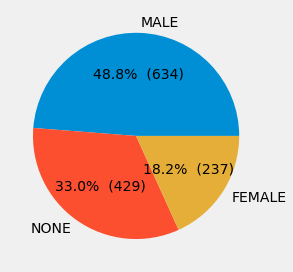

In [90]:
# make the pie circular by setting the aspect ratio to 1
plt.figure(figsize=plt.figaspect(1))
values = df_master.gender.value_counts().values
labels = [x.upper() for x in list(df_master.gender.value_counts().index)]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.tight_layout()
plt.savefig("gender_pie_chart.png")

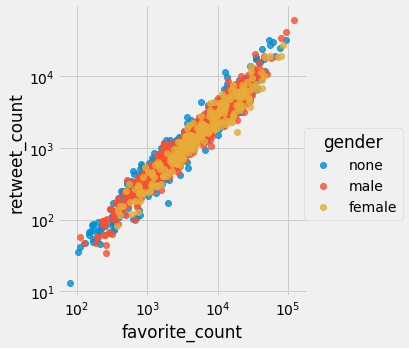

In [91]:
sns.lmplot(x="favorite_count", y="retweet_count",data=df_master, hue='gender', fit_reg=False)
plt.xscale('log');
plt.yscale('log');

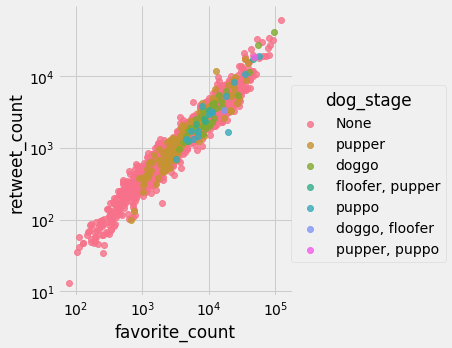

In [92]:
sns.lmplot(x="favorite_count", y="retweet_count",data=df_master, hue='dog_stage', fit_reg=False);
plt.xscale('log');
plt.yscale('log');

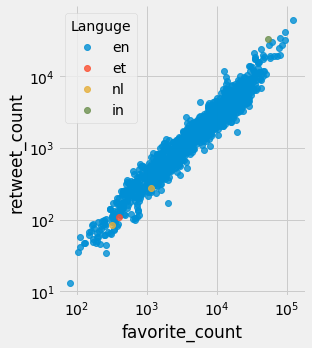

In [93]:
sns.lmplot(x="favorite_count", y="retweet_count",data=df_master, hue='lang', fit_reg=False,
          legend=False);
plt.xscale('log');
plt.yscale('log');
plt.legend(title='Languge');

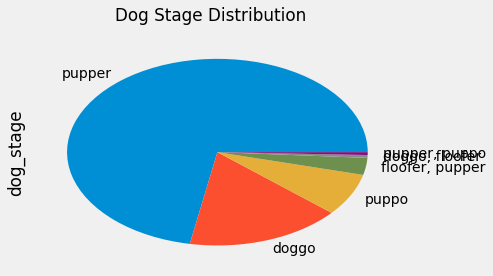

In [94]:
df_master[df_master.dog_stage!='None'].dog_stage.value_counts().plot.pie(subplots=True, title="Dog Stage Distribution");

In [95]:
df_master.head()

,tweet_id,text,name,source,rating_numerator,rating_denominator,dog_stage,gender,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence,favorite_count,retweet_count,lang
created_at,,,,,,,,,,,,,,,,,,,,,
2015-11-15 23:05:30,666029285002620928,This is a western brown Mitsubishi terrier Ups...,None,Twitter for iPhone,7.0,10.0,None,none,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,0.074192,True,Rhodesian Ridgeback,0.072010,True,Redbone,0.506826,130,47,en
2015-11-16 00:04:52,666044226329800704,This is a purebred Piers Morgan Loves to Netfl...,None,Twitter for iPhone,6.0,10.0,None,male,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,0.360687,True,Miniature Pinscher,0.222752,True,Rhodesian Ridgeback,0.408143,300,141,en
2015-11-16 00:35:11,666051853826850816,This is an odd dog Hard on the outside but lov...,None,Twitter for iPhone,2.0,10.0,None,none,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,...,0.045885,False,Terrapin,0.017885,False,Unidentifiable,0.000000,1231,856,en
2015-11-16 00:55:59,666057090499244032,My oh my This is a rare blond Canadian terrier...,None,Twitter for iPhone,9.0,10.0,None,none,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,...,0.014594,False,Golden Retriever,0.007959,True,Golden Retriever,0.007959,298,142,en
2015-11-16 01:01:59,666058600524156928,Here is the Rand Paul of retrievers folks! He'...,None,Twitter for iPhone,8.0,10.0,None,male,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,...,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True,Miniature Poodle,0.201493,112,58,en


In [96]:
df_master.head()

,tweet_id,text,name,source,rating_numerator,rating_denominator,dog_stage,gender,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence,favorite_count,retweet_count,lang
created_at,,,,,,,,,,,,,,,,,,,,,
2015-11-15 23:05:30,666029285002620928,This is a western brown Mitsubishi terrier Ups...,None,Twitter for iPhone,7.0,10.0,None,none,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,0.074192,True,Rhodesian Ridgeback,0.072010,True,Redbone,0.506826,130,47,en
2015-11-16 00:04:52,666044226329800704,This is a purebred Piers Morgan Loves to Netfl...,None,Twitter for iPhone,6.0,10.0,None,male,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,0.360687,True,Miniature Pinscher,0.222752,True,Rhodesian Ridgeback,0.408143,300,141,en
2015-11-16 00:35:11,666051853826850816,This is an odd dog Hard on the outside but lov...,None,Twitter for iPhone,2.0,10.0,None,none,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,...,0.045885,False,Terrapin,0.017885,False,Unidentifiable,0.000000,1231,856,en
2015-11-16 00:55:59,666057090499244032,My oh my This is a rare blond Canadian terrier...,None,Twitter for iPhone,9.0,10.0,None,none,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,...,0.014594,False,Golden Retriever,0.007959,True,Golden Retriever,0.007959,298,142,en
2015-11-16 01:01:59,666058600524156928,Here is the Rand Paul of retrievers folks! He'...,None,Twitter for iPhone,8.0,10.0,None,male,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,...,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True,Miniature Poodle,0.201493,112,58,en


In [97]:
df_master['rating_ratio']=df_master['rating_numerator']/df_master['rating_denominator']

In [98]:
df_master[df_master.rating_ratio >= 10]

,tweet_id,text,name,source,rating_numerator,rating_denominator,dog_stage,gender,jpg_url,img_num,...,p2_dog,p3,p3_conf,p3_dog,breed,confidence,favorite_count,retweet_count,lang,rating_ratio
created_at,,,,,,,,,,,,,,,,,,,,,
2015-11-29 05:52:33,670842764863651840,After so many requests here you go\n\nGood dog...,None,Twitter for iPhone,420.0,10.0,None,none,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,...,False,Drumstick,0.061113,False,Unidentifiable,0.0,25572,9314,en,42.0
2016-07-04 15:00:45,749981277374128128,This is Atticus He's quite simply America af 1...,Atticus,TweetDeck,1776.0,10.0,None,male,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,...,False,Sunglass,0.050776,False,Unidentifiable,0.0,5520,2712,en,177.6


In [99]:
df_master.loc[df_master[df_master.rating_ratio >= 10].index[0]]

tweet_id                                             670842764863651840
text                  After so many requests here you go\n\nGood dog...
name                                                               None
source                                               Twitter for iPhone
rating_numerator                                                    420
rating_denominator                                                   10
dog_stage                                                          None
gender                                                             none
jpg_url                 https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg
img_num                                                               1
p1                                                           Microphone
p1_conf                                                       0.0960627
p1_dog                                                            False
p2                                                            Ac

In [100]:
df_master.loc[df_master[df_master.rating_ratio >= 10].index[1]]

tweet_id                                             749981277374128128
text                  This is Atticus He's quite simply America af 1...
name                                                            Atticus
source                                                        TweetDeck
rating_numerator                                                   1776
rating_denominator                                                   10
dog_stage                                                          None
gender                                                             male
jpg_url                 https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
img_num                                                               1
p1                                                              Bow Tie
p1_conf                                                        0.533941
p1_dog                                                            False
p2                                                           Sun

In [101]:
df_master[df_master.rating_ratio < 0.21][['p1','p1_dog','p2','p2_dog','p3','p3_dog','text','jpg_url','gender']]

,p1,p1_dog,p2,p2_dog,p3,p3_dog,text,jpg_url,gender
created_at,,,,,,,,,
2015-11-16 00:35:11,Box Turtle,False,Mud Turtle,False,Terrapin,False,This is an odd dog Hard on the outside but lov...,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,none
2015-11-16 04:02:55,Hen,False,Cock,False,Partridge,False,Not familiar with this breed No tail (weird) O...,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,none
2015-11-18 01:12:41,Snail,False,Slug,False,Acorn,False,Unfamiliar with this breed Ears pointy af Won'...,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,none
2015-11-20 03:44:31,Electric Fan,False,Spotlight,False,Lampshade,False,Never seen dog like this Breathes heavy Tilts ...,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,none
2015-11-21 19:02:04,Angora,False,Hen,False,Wood Rabbit,False,This lil pup is Oliver Hops around Has wings b...,https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg,none
2015-11-29 04:47:03,Scorpion,False,Tarantula,False,Wolf Spider,False,Scary dog here Too many legs Extra tail Not so...,https://pbs.twimg.com/media/CU9A8ZuWsAAt_S1.jpg,none
2015-12-11 03:21:23,Paper Towel,False,Mailbox,False,Seat Belt,False,What kind of person sends in a picture without...,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,none
2015-12-20 03:58:55,Maltese Dog,True,Toy Poodle,True,Shih-Tzu,True,This is Crystal She's a shitty fireman No sens...,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,female
2016-04-21 02:25:47,Great Dane,True,Greater Swiss Mountain Dog,True,Weimaraner,True,Happy 4/20 from the squad! 13/10 for all https...,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,none


In [102]:
df_master.loc['2016-04-21 02:25:47']['text']

'Happy 4/20 from the squad! 13/10 for all https://tco/eV1diwds8a'

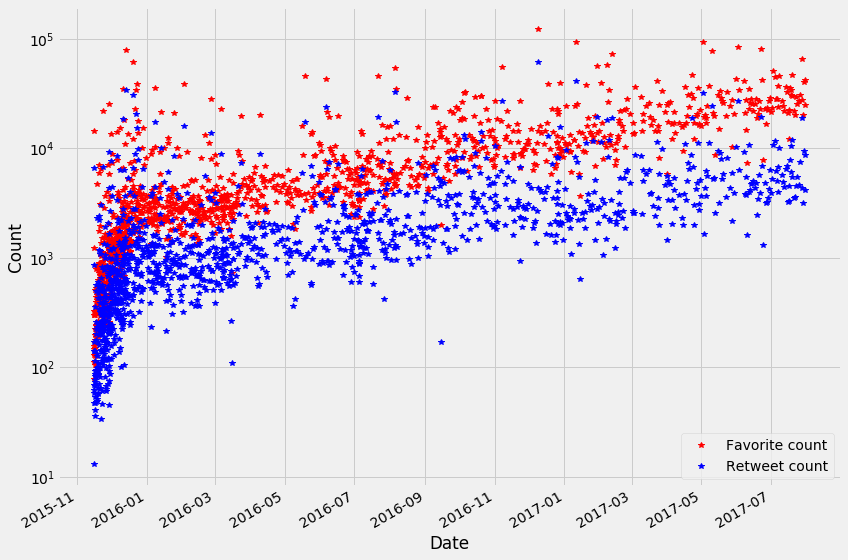

In [103]:
df_master['favorite_count'].plot(style='r*', figsize=(12,8), label='Favorite count');
df_master.retweet_count.plot(style='b*',label='Retweet count');
plt.legend()
plt.yscale("log")
plt.xlabel("Date");plt.ylabel("Count");
plt.tight_layout()
plt.savefig("favorite_Retweet_count.png")

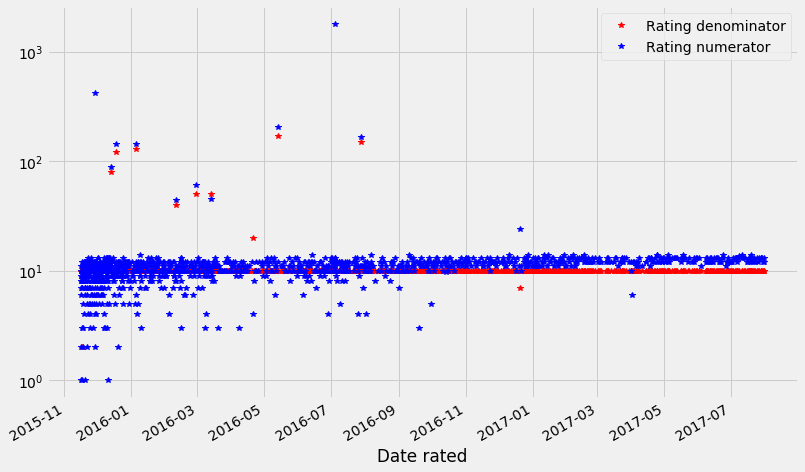

In [104]:
df_master['rating_denominator'].plot(style='r*', figsize=(12,8), label='Rating denominator');
df_master.rating_numerator.plot(style='b*',label='Rating numerator');
plt.legend()
plt.yscale("log")
plt.xlabel("Date rated");

In [105]:
df_master.rating_numerator.value_counts()

10.00      304
12.00      288
11.00      249
13.00      157
9.00        96
8.00        64
7.00        35
6.00        22
5.00        18
14.00       18
3.00        13
4.00        13
2.00         5
1.00         4
143.00       1
1776.00      1
144.00       1
44.00        1
60.00        1
45.00        1
204.00       1
9.75         1
24.00        1
13.50        1
165.00       1
11.27        1
420.00       1
88.00        1
Name: rating_numerator, dtype: int64

In [106]:
df_master.index.name

'created_at'

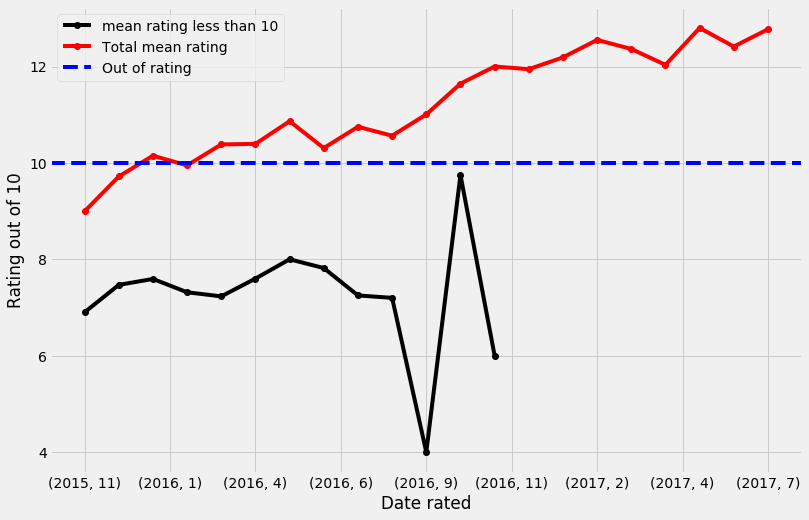

In [107]:
AA = df_master[(df_master.rating_numerator < 10)&(df_master.rating_denominator == 10)]
AA.groupby([(AA.index.year),(AA.index.month)])['rating_numerator'].mean().plot(style='-ko', figsize=(12,8),
                                                                         label='mean rating less than 10')

AA = df_master[(df_master.rating_numerator < df_master.rating_numerator.mean() + df_master.rating_numerator.std())
              &(df_master.rating_denominator == 10)]
AA.groupby([(AA.index.year),(AA.index.month)])['rating_numerator'].mean().plot(style='-ro', figsize=(12,8),
                                                                          label='Total mean rating')
plt.axhline(y=10.0, color='b', linestyle='--', label='Out of rating')
plt.xlabel("Date rated");
plt.ylabel("Rating out of 10");
plt.legend()

In [108]:
AA.groupby([(AA.index.year),(AA.index.month)])['favorite_count'].mean()

created_at  created_at
2015        11             1035.777251
            12             3840.773504
2016        1              4029.654206
            2              4218.337662
            3              4072.643836
            4              4729.210526
            5              6455.621622
            6              7255.250000
            7              7014.859375
            8              9574.487179
            9             11258.534884
            10            14679.200000
            11            13994.187500
            12            16636.111111
2017        1             16865.162162
            2             19848.103448
            3             20331.681818
            4             21667.517241
            5             28427.400000
            6             28417.620690
            7             31299.030303
Name: favorite_count, dtype: float64

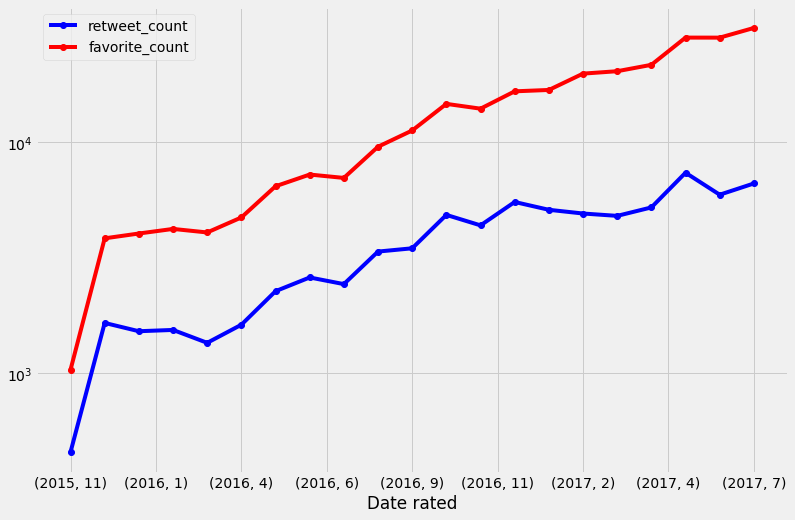

In [109]:
AA.groupby([(AA.index.year),(AA.index.month)])['retweet_count'].mean().plot(style='-bo', 
                                                    label="retweet_count", figsize=(12,8))
AA.groupby([(AA.index.year),(AA.index.month)])['favorite_count'].mean().plot(style='-ro',
                                                                            label="favorite_count")
plt.yscale('log')
plt.legend()
plt.xlabel("Date rated");

In [110]:
df_master.dog_stage.value_counts()

None               1096
pupper              147
doggo                34
puppo                15
floofer, pupper       6
doggo, floofer        1
pupper, puppo         1
Name: dog_stage, dtype: int64

In [111]:
df_master[df_master.gender=='both']

,tweet_id,text,name,source,rating_numerator,rating_denominator,dog_stage,gender,jpg_url,img_num,...,p2_dog,p3,p3_conf,p3_dog,breed,confidence,favorite_count,retweet_count,lang,rating_ratio
created_at,,,,,,,,,,,,,,,,,,,,,


In [112]:
df_master.rating_denominator.value_counts()

10.0     1289
50.0        2
150.0       1
170.0       1
130.0       1
7.0         1
20.0        1
40.0        1
120.0       1
80.0        1
2.0         1
Name: rating_denominator, dtype: int64

In [113]:
len(df_master)

1300

In [114]:
X=df_master[(df_master.gender!='none')&(df_master.rating_numerator < 20)&(df_master.dog_stage!='None')]

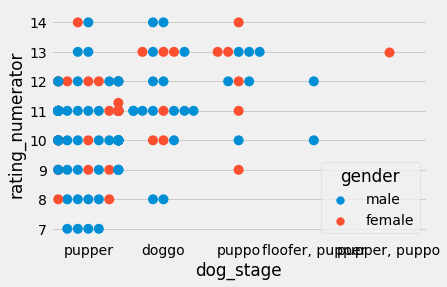

In [115]:
sns.swarmplot(x="dog_stage", y="rating_numerator", hue='gender',
              data=X, size=10);

In [116]:
X['gender'].unique()

array(['male', 'female'], dtype=object)

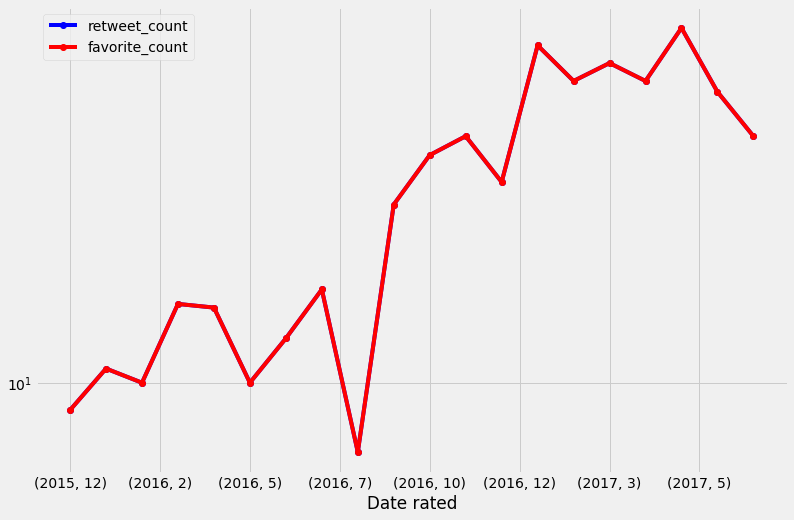

In [117]:
X.groupby([(X.index.year),(X.index.month)])['rating_numerator'].mean().plot(style='-bo', 
                                                    label="retweet_count", figsize=(12,8))
X.groupby([(X.index.year),(X.index.month)])['rating_numerator'].mean().plot(style='-ro',
                                                                            label="favorite_count")
plt.yscale('log')
plt.legend()
plt.xlabel("Date rated");

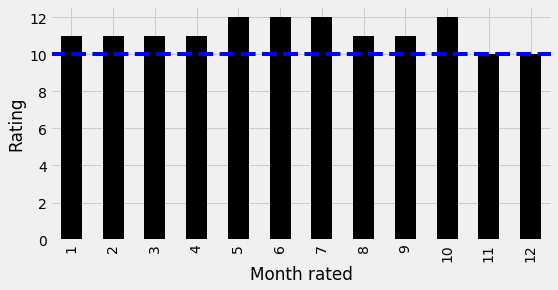

In [118]:
X=df_master[df_master.rating_numerator < 20]
X.groupby([(X.index.month)])['rating_numerator'].median().plot(kind='bar', 
                                                    label="retweet_count", figsize=(8,4),color='black')
plt.xlabel("Month rated");plt.ylabel("Rating");
plt.axhline(y=10.0, color='b', linestyle='--', label='Out of rating')

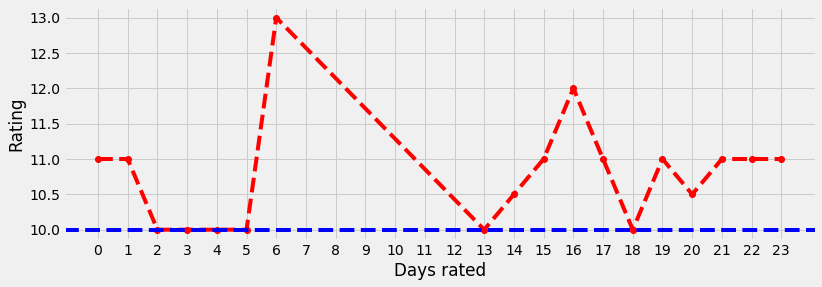

In [119]:
X=df_master
X.groupby([(X.index.hour)])['rating_numerator'].median().plot(kind='line', 
                                                    label="retweet_count", 
                                    figsize=(12,4),  color='r',linestyle='--', marker='o')
plt.xlabel("Days rated");plt.ylabel("Rating");
plt.axhline(y=10.0, color='b', linestyle='--', label='Out of rating')
plt.xticks(np.arange(0,24, 1));

In [120]:
X.index.hour.unique()

Int64Index([23, 0, 1, 3, 4, 14, 15, 16, 19, 20, 2, 18, 5, 17, 21, 22, 13, 6], dtype='int64', name=u'created_at')

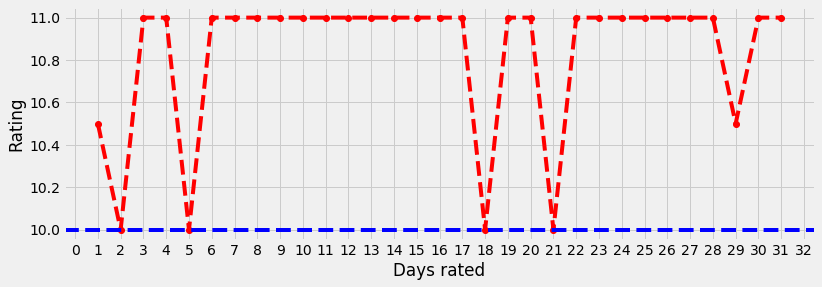

In [121]:
X=df_master
X.groupby([(X.index.day)])['rating_numerator'].median().plot(kind='line', 
                                                    label="retweet_count", 
                                    figsize=(12,4),  color='r',linestyle='--', marker='o')
plt.xlabel("Days rated");plt.ylabel("Rating");
plt.axhline(y=10.0, color='b', linestyle='--', label='Out of rating')
plt.xticks(np.arange(0,33, 1));

In [122]:
X=df_master[df_master.rating_numerator < 20]
np.array(set(X.index.year))
X.groupby([(X.index.year)])['rating_numerator'].mean().values

array([  9.35650224,  10.64165884,  12.43872549])

In [123]:
list(X.groupby([(X.index.year)])['rating_numerator'].mean().index)

[2015, 2016, 2017]

In [124]:
colors = ["green", "black", "pink", "dusty purple"]

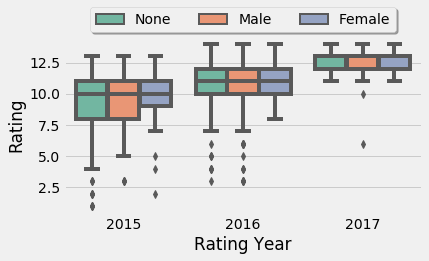

In [125]:
X=df_master[df_master.rating_numerator < 20]
plt.subplots(figsize=(6,4))
sns.boxplot(X.index.year, X.rating_numerator, hue=X.gender.str.title(), palette="Set2");
plt.legend(loc=8)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.xlabel("Rating Year"); plt.ylabel("Rating");
plt.tight_layout()
plt.savefig("Rating_per_year.png")

In [126]:
X=df_master[df_master.rating_numerator < 20]
list(X.groupby([(X.index.year)])['rating_numerator'].mean().values)

[9.356502242152466, 10.641658841940533, 12.438725490196079]

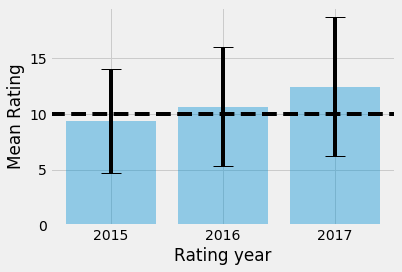

In [127]:
X=df_master[df_master.rating_numerator < 20]
# Build the plot
fig, ax = plt.subplots()
ax.bar(list(X.groupby([(X.index.year)])['rating_numerator'].mean().index), 
       X.groupby([(X.index.year)])['rating_numerator'].mean().values, 
       yerr=0.5*(X.groupby([(X.index.year)])['rating_numerator'].mean().values), 
       align='center', alpha=0.4, ecolor='black', capsize=10)
plt.xticks(np.arange(2015, 2018, 1));
plt.xlabel("Rating year");plt.ylabel("Mean Rating");
plt.axhline(y=10.0, color='k', linestyle='--', label='Out of rating')
plt.tight_layout()

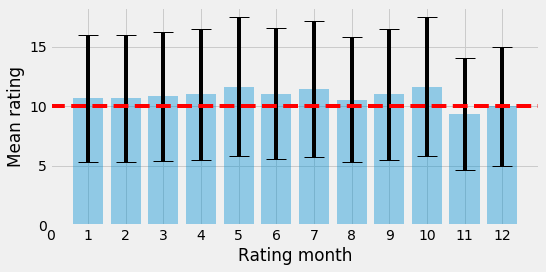

In [128]:
# Build the plot
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(list(X.groupby([(X.index.month)])['rating_numerator'].mean().index), 
       X.groupby([(X.index.month)])['rating_numerator'].mean().values, 
       yerr=0.50*(X.groupby([(X.index.month)])['rating_numerator'].mean().values), 
       align='center', alpha=0.4, ecolor='black', capsize=10)
plt.xticks(np.arange(0, 13, 1));
plt.grid(True)
plt.xlabel("Rating month");plt.ylabel("Mean rating");
plt.axhline(y=10.0, color='r', linestyle='--', label='Out of rating')
plt.tight_layout()

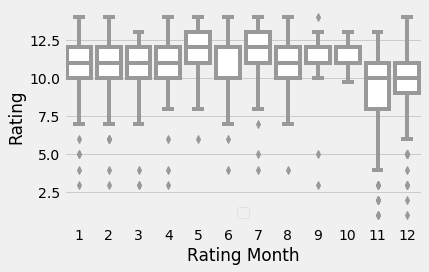

In [129]:
X=df_master[df_master.rating_numerator < 20]
sns.boxplot(X.index.month, X.rating_numerator, color="white");
plt.legend(loc=8)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.xlabel("Rating Month"); plt.ylabel("Rating");
plt.tight_layout()
plt.savefig("Rating_per_month.png")

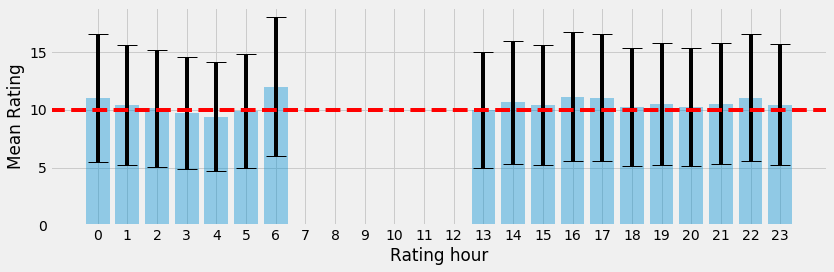

In [130]:
# Build the plot
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(list(X.groupby([(X.index.hour)])['rating_numerator'].mean().index),
       X.groupby([(X.index.hour)])['rating_numerator'].mean().values, 
       yerr=0.50*(X.groupby([(X.index.hour)])['rating_numerator'].mean().values), 
       align='center', alpha=0.4, ecolor='black', capsize=10)
plt.xticks(np.arange(0, 24, 1));
plt.grid(True)
plt.xlabel("Rating hour");plt.ylabel("Mean Rating");
plt.axhline(y=10.0, color='r', linestyle='--', label='Out of rating')
plt.tight_layout()

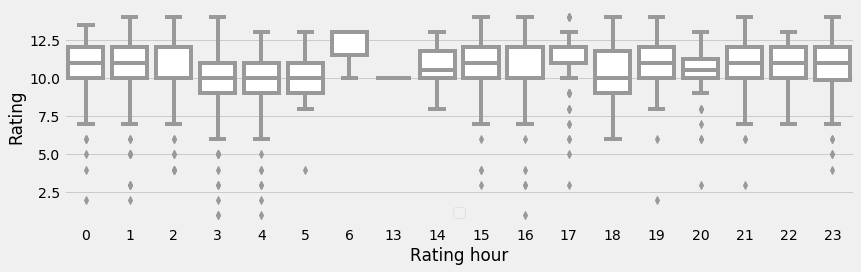

In [131]:
X=df_master[df_master.rating_numerator < 20]
plt.subplots(figsize=(12,4))
sns.boxplot(X.index.hour, X.rating_numerator, color="white");
plt.legend(loc=8)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.xlabel("Rating hour"); plt.ylabel("Rating");
plt.tight_layout()
plt.savefig("Rating_per_hour.png")
#plt.xticks(np.arange(0, 24, 1));

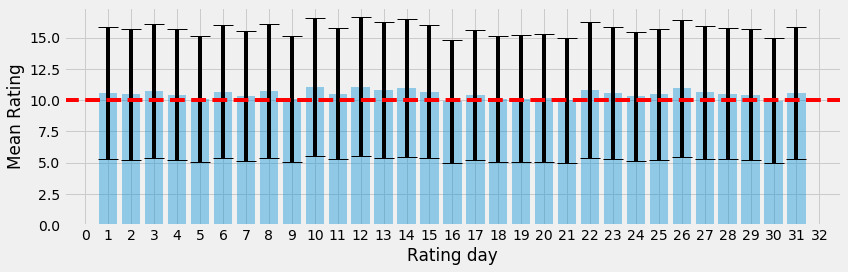

In [132]:
# Build the plot
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(list(set(X.index.day)), X.groupby([(X.index.day)])['rating_numerator'].mean().values, 
       yerr=0.50*(X.groupby([(X.index.day)])['rating_numerator'].mean().values), 
       align='center', alpha=0.4, ecolor='black', capsize=10)
plt.xticks(np.arange(0, 33, 1));
plt.axhline(y=10.0, color='r', linestyle='--', label='Out of rating')
plt.grid(True)
plt.xlabel("Rating day");plt.ylabel("Mean Rating");
plt.tight_layout()

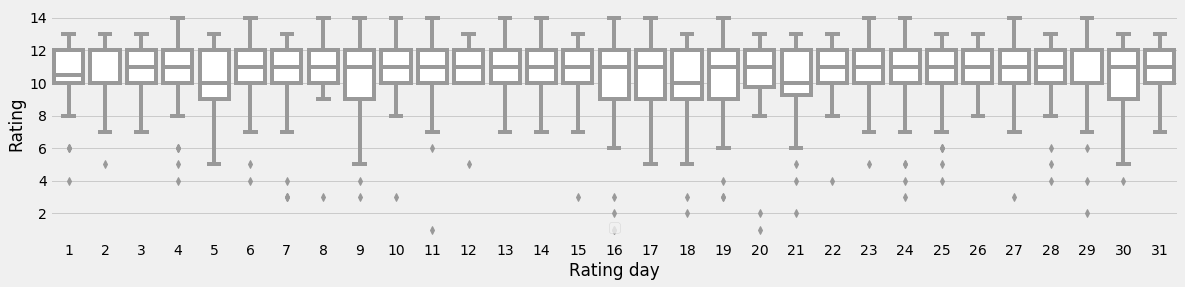

In [133]:
X=df_master[df_master.rating_numerator < 20]
plt.subplots(figsize=(18,4))
sns.boxplot(X.index.day, X.rating_numerator, color="white");
plt.legend(loc=8)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.xlabel("Rating day"); plt.ylabel("Rating");
#plt.xticks(np.arange(0, 24, 1));

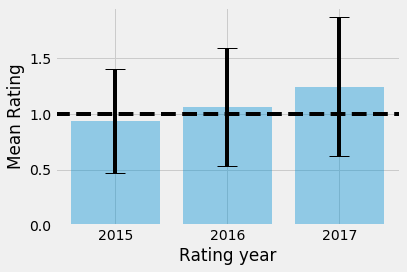

In [134]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(list(X.groupby([(X.index.year)])['rating_ratio'].mean().index), 
       X.groupby([(X.index.year)])['rating_ratio'].mean().values, 
       yerr=0.5*(X.groupby([(X.index.year)])['rating_ratio'].mean().values), 
       align='center', alpha=0.4, ecolor='black', capsize=10)
plt.xticks(np.arange(2015, 2018, 1));
plt.xlabel("Rating year");plt.ylabel("Mean Rating");
plt.axhline(y=1.0, color='k', linestyle='--', label='Out of rating')
plt.tight_layout()

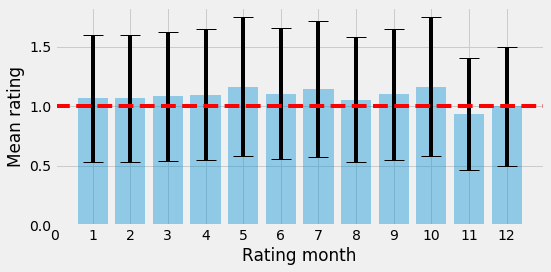

In [135]:
# Build the plot
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(list(X.groupby([(X.index.month)])['rating_ratio'].mean().index), 
       X.groupby([(X.index.month)])['rating_ratio'].mean().values, 
       yerr=0.50*(X.groupby([(X.index.month)])['rating_ratio'].mean().values), 
       align='center', alpha=0.4, ecolor='black', capsize=10)
plt.xticks(np.arange(0, 13, 1));
plt.grid(True)
plt.xlabel("Rating month");plt.ylabel("Mean rating");
plt.axhline(y=1.0, color='r', linestyle='--', label='Out of rating')
plt.tight_layout()

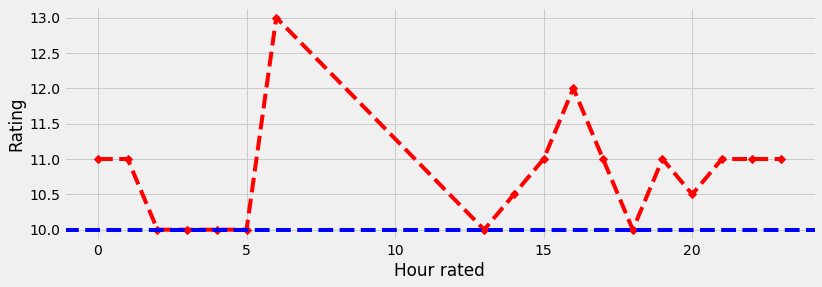

In [136]:
X=df_master[df_master.rating_numerator < 20]
X.groupby([(X.index.hour)])['rating_numerator'].median().plot(kind='line',  color='r',linestyle='--',
marker='D',                                                   label="retweet_count", figsize=(12,4))
plt.xlabel("Hour rated");plt.ylabel("Rating");
plt.axhline(y=10.0, color='b', linestyle='--', label='Out of rating')

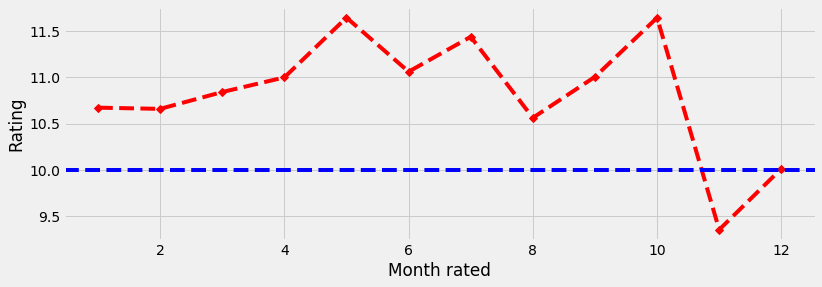

In [137]:
X=df_master[df_master.rating_numerator < 20]
X.groupby([(X.index.month)])['rating_numerator'].mean().plot(kind='line',  color='r',linestyle='--',
marker='D',                                                   label="retweet_count", figsize=(12,4))
plt.xlabel("Month rated");plt.ylabel("Rating");
plt.axhline(y=10.0, color='b', linestyle='--', label='Out of rating')

In [138]:
df_master[df_master.rating_numerator > 13]

,tweet_id,text,name,source,rating_numerator,rating_denominator,dog_stage,gender,jpg_url,img_num,...,p2_dog,p3,p3_conf,p3_dog,breed,confidence,favorite_count,retweet_count,lang,rating_ratio
created_at,,,,,,,,,,,,,,,,,,,,,
2015-11-29 05:52:33,670842764863651840,After so many requests here you go\n\nGood dog...,None,Twitter for iPhone,420.0,10.0,None,none,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,...,False,Drumstick,0.061113,False,Unidentifiable,0.000000,25572,9314,en,42.000000
2015-12-13 01:41:41,675853064436391936,Here we have an entire platoon of puppers Tota...,None,Twitter for iPhone,88.0,80.0,None,none,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,1,...,True,Vizsla,0.028207,True,Labrador Retriever,0.868367,2848,1413,en,1.100000
2015-12-18 05:06:23,677716515794329600,IT'S PUPPERGEDDON Total of 144/120 I think htt...,None,Twitter for iPhone,144.0,120.0,None,none,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1,...,False,Chow,0.025438,True,Chow,0.025438,3244,1069,en,1.200000
2016-01-05 04:11:44,684225744407494656,Two sneaky puppers were not initially seen mov...,None,Twitter for iPhone,143.0,130.0,None,none,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,2,...,True,Great Pyrenees,0.065327,True,Golden Retriever,0.203249,1332,233,en,1.100000
2016-01-08 19:45:39,685547936038666240,Everybody needs to read this Jack is our first...,None,Twitter for iPhone,14.0,10.0,pupper,none,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,...,False,Hand-Held Computer,0.008769,False,Unidentifiable,0.000000,35438,17294,en,1.400000
2016-02-10 16:51:59,697463031882764288,Happy Wednesday here's a bucket of pups 44/40 ...,None,Twitter for iPhone,44.0,40.0,None,none,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1,...,True,Pug,0.000008,True,Labrador Retriever,0.999885,3667,1513,en,1.100000
2016-02-28 21:25:30,704054845121142784,Here is a whole flock of puppers 60/50 I'll t...,None,Twitter for iPhone,60.0,50.0,None,none,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,...,True,Golden Retriever,0.043885,True,Great Pyrenees,0.667939,3136,1004,en,1.200000
2016-03-14 02:04:08,709198395643068416,From left to right:\nCletus Jerome Alejandro B...,None,Twitter for iPhone,45.0,50.0,None,none,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,...,True,English Setter,0.083184,True,Borzoi,0.490783,2579,701,en,0.900000
2016-05-13 16:15:54,731156023742988288,Say hello to this unbelievably well behaved sq...,This,Twitter for iPhone,204.0,170.0,None,none,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,...,False,King Penguin,0.049444,False,Unidentifiable,0.000000,4105,1390,en,1.200000


In [139]:
df_master.loc['2015-12-13 01:41:41']

tweet_id                                             675853064436391936
text                  Here we have an entire platoon of puppers Tota...
name                                                               None
source                                               Twitter for iPhone
rating_numerator                                                     88
rating_denominator                                                   80
dog_stage                                                          None
gender                                                             none
jpg_url                 https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg
img_num                                                               1
p1                                                   Labrador Retriever
p1_conf                                                        0.868367
p1_dog                                                             True
p2                                                     Golden Re

In [140]:
df_master.source.value_counts()

Twitter for iPhone    1273
Twitter Web Client      18
TweetDeck                9
Name: source, dtype: int64

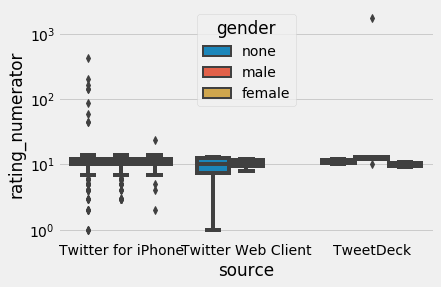

In [141]:
sns.boxplot(x="source", y="rating_numerator", data=df_master, hue="gender")
plt.yscale("log")

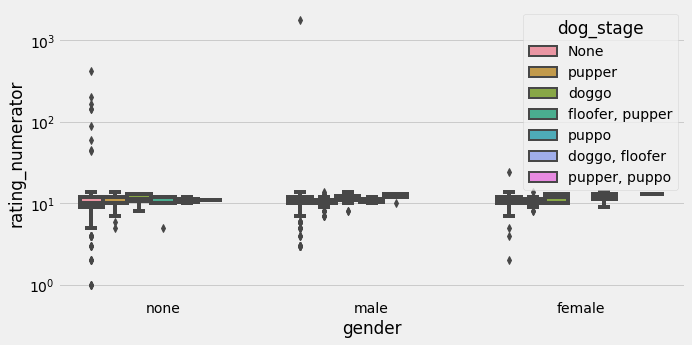

In [142]:
plt.figure(figsize=(10,5))
sns.boxplot(x="gender", y="rating_numerator", data=df_master, hue="dog_stage")
plt.yscale("log")

In [143]:
df_master.breed.value_counts()[:10]

Unidentifiable        200
Golden Retriever      109
Pembroke               71
Labrador Retriever     68
Chihuahua              55
Pug                    44
Pomeranian             28
Chow                   26
Toy Poodle             25
Cocker Spaniel         24
Name: breed, dtype: int64

In [144]:
X.groupby([(X.index.year), (X.index.month)]).count()['tweet_id']

created_at  created_at
2015        11            212
            12            234
2016        1             107
            2              77
            3              73
            4              39
            5              37
            6              52
            7              64
            8              39
            9              43
            10             40
            11             32
            12             36
2017        1              37
            2              29
            3              22
            4              29
            5              25
            6              29
            7              33
Name: tweet_id, dtype: int64

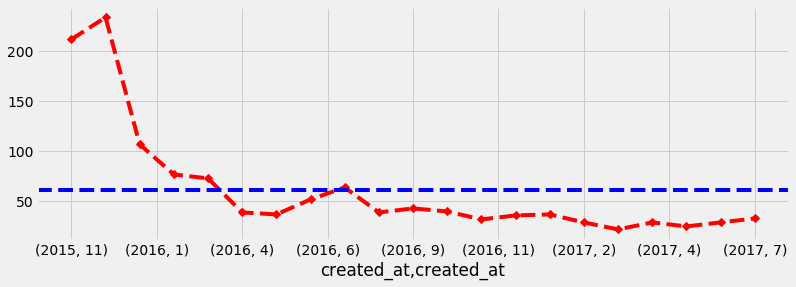

In [145]:
mn=np.mean(X.groupby([(X.index.year), (X.index.month)]).count()['tweet_id'])
X.groupby([(X.index.year), (X.index.month)]).count()['tweet_id'].plot(kind='line',  color='r',linestyle='--',
marker='D',                                                    figsize=(12,4));
#plt.axhlines(y=mn,color='b',linestyle='-')
plt.axhline(y=mn, color='b', linestyle='--', label='Out of rating')
#plt.xticks(np.arange(0, 13, 1));

In [146]:
df_master[df_master.rating_denominator < 15].groupby('gender')['rating_denominator'].mean()

gender
female     9.987342
male      10.000000
none       9.980952
Name: rating_denominator, dtype: float64

In [147]:
df_master.name.value_counts()[:11]

None       419
Oliver       8
Winston      7
Tucker       7
Penny        6
Lucy         6
Cooper       6
Lola         5
Toby         5
Bella        5
Sadie        5
Name: name, dtype: int64

In [148]:
df_master.columns

Index([u'tweet_id', u'text', u'name', u'source', u'rating_numerator', u'rating_denominator', u'dog_stage', u'gender', u'jpg_url', u'img_num', u'p1', u'p1_conf', u'p1_dog', u'p2', u'p2_conf', u'p2_dog', u'p3', u'p3_conf', u'p3_dog', u'breed', u'confidence', u'favorite_count', u'retweet_count', u'lang', u'rating_ratio'], dtype='object')

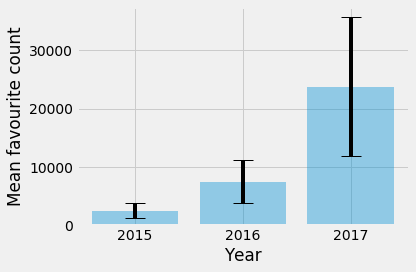

In [149]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(list(X.groupby([(X.index.year)])['favorite_count'].mean().index), 
       X.groupby([(X.index.year)])['favorite_count'].mean().values, 
       yerr=0.5*(X.groupby([(X.index.year)])['favorite_count'].mean().values), 
       align='center', alpha=0.4, ecolor='black', capsize=10)
plt.xticks(np.arange(2015, 2018, 1));
plt.ylabel("Mean favourite count");plt.xlabel("Year");
#plt.axhline(y=1.0, color='k', linestyle='--', label='Out of rating')
plt.tight_layout()

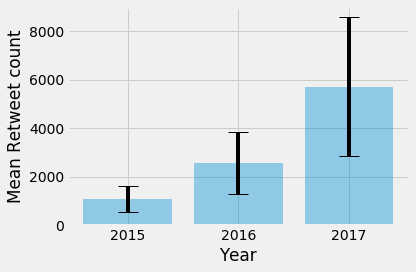

In [150]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(list(X.groupby([(X.index.year)])['retweet_count'].mean().index), 
       X.groupby([(X.index.year)])['retweet_count'].mean().values, 
       yerr=0.5*(X.groupby([(X.index.year)])['retweet_count'].mean().values), 
       align='center', alpha=0.4, ecolor='black', capsize=10)
plt.xticks(np.arange(2015, 2018, 1));
plt.ylabel("Mean Retweet count");plt.xlabel("Year");
#plt.axhline(y=1.0, color='k', linestyle='--', label='Out of rating')
plt.tight_layout()

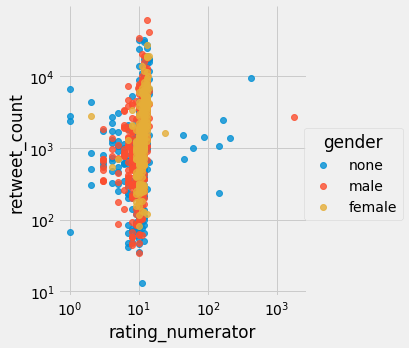

In [151]:
sns.lmplot(x='rating_numerator',y='retweet_count',data=df_master, hue='gender',fit_reg=False)
plt.xscale("log");
plt.yscale("log");

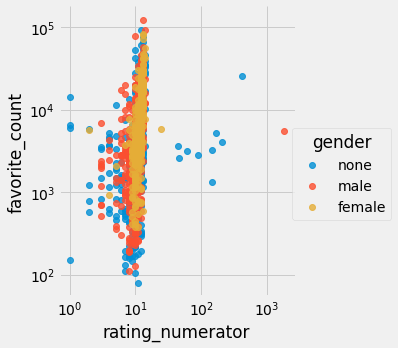

In [152]:
sns.lmplot(x='rating_numerator',y='favorite_count',data=df_master, hue='gender',fit_reg=False)
plt.xscale("log");
plt.yscale("log");

In [153]:
df_master['f_r']=df_master['favorite_count']/df_master['retweet_count']

In [154]:
df_master['gender']=df_master['gender'].str.title()

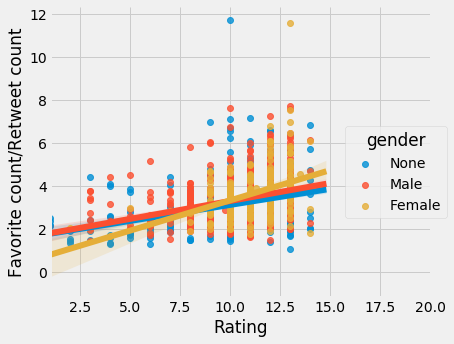

In [155]:
sns.lmplot(x='rating_numerator',y='f_r',data=df_master[df_master.rating_numerator<20], 
           hue='gender', fit_reg=True)
#plt.xscale("log");
#plt.yscale("log");
plt.xlabel("Rating")
plt.ylabel("Favorite count/Retweet count");
plt.xlim([1,20]);
plt.tight_layout()
plt.savefig("Favorite count_Retweet_count.png")

In [156]:
df_master[df_master.gender=='Female'][['rating_numerator','favorite_count','retweet_count','f_r']].corr()

,rating_numerator,favorite_count,retweet_count,f_r
rating_numerator,1.000000,0.429648,0.358085,0.332677
favorite_count,0.429648,1.000000,0.941854,0.252016
retweet_count,0.358085,0.941854,1.000000,-0.000621
f_r,0.332677,0.252016,-0.000621,1.000000


In [157]:
df_master[df_master.gender=='Male'][['rating_numerator','favorite_count','retweet_count','f_r']].corr()

,rating_numerator,favorite_count,retweet_count,f_r
rating_numerator,1.000000,0.002180,0.011052,-0.041621
favorite_count,0.002180,1.000000,0.928965,0.216970
retweet_count,0.011052,0.928965,1.000000,-0.031012
f_r,-0.041621,0.216970,-0.031012,1.000000


In [158]:
df_master[df_master.gender=='None'][['rating_numerator','favorite_count','retweet_count','f_r']].corr()

,rating_numerator,favorite_count,retweet_count,f_r
rating_numerator,1.000000,0.068712,0.066472,0.020582
favorite_count,0.068712,1.000000,0.924598,0.119550
retweet_count,0.066472,0.924598,1.000000,-0.088772
f_r,0.020582,0.119550,-0.088772,1.000000


In [159]:
df_master[['rating_numerator','favorite_count','retweet_count']].describe()

,rating_numerator,favorite_count,retweet_count
count,1300.000000,1300.000000,1300.000000
mean,12.787323,8320.996923,2540.515385
std,51.096951,11493.551047,4062.793330
min,1.000000,79.000000,13.000000
25%,10.000000,1722.500000,587.750000
50%,11.000000,3853.000000,1271.500000
75%,12.000000,10308.250000,3008.250000
max,1776.000000,123273.000000,61272.000000


In [160]:
df_master[df_master.retweet_count==61272]

,tweet_id,text,name,source,rating_numerator,rating_denominator,dog_stage,gender,jpg_url,img_num,...,p3,p3_conf,p3_dog,breed,confidence,favorite_count,retweet_count,lang,rating_ratio,f_r
created_at,,,,,,,,,,,,,,,,,,,,,
2016-12-09 06:17:20,807106840509214720,This is Stephan He just wants to help 13/10 su...,Stephan,Twitter for iPhone,13.0,10.0,None,Male,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,...,Toy Terrier,0.077008,True,Chihuahua,0.50537,123273,61272,en,1.3,2.011898


In [161]:
df_master[df_master.retweet_count==61272]['jpg_url'].values

array([ 'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg'], dtype=object)

In [162]:
df_master[df_master.retweet_count==61272]['text'].values

array([ 'This is Stephan He just wants to help 13/10 such a good boy https://tco/DkBYaCAg2d'], dtype=object)

In [163]:
df_master[df_master.rating_numerator==1776]

,tweet_id,text,name,source,rating_numerator,rating_denominator,dog_stage,gender,jpg_url,img_num,...,p3,p3_conf,p3_dog,breed,confidence,favorite_count,retweet_count,lang,rating_ratio,f_r
created_at,,,,,,,,,,,,,,,,,,,,,
2016-07-04 15:00:45,749981277374128128,This is Atticus He's quite simply America af 1...,Atticus,TweetDeck,1776.0,10.0,None,Male,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,...,Sunglass,0.050776,False,Unidentifiable,0.0,5520,2712,en,177.6,2.035398


In [164]:
df_master[df_master.rating_numerator==1776]['jpg_url'].values

array(['https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg'], dtype=object)

In [165]:
df_master[df_master.rating_numerator==1776]['text'].values

array([ "This is Atticus He's quite simply America af 1776/10 https://tco/GRXwMxLBkh"], dtype=object)